<a href="https://colab.research.google.com/github/pascal-maker/Python/blob/master/Data_Cleaning_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/heart.csv')
dataset.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1.0,1
1,37.0,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2.0,1
2,41.0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2.0,1
3,56.0,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2.0,1
4,57.0,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2.0,1
5,57.0,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1.0,1
6,56.0,0,1,140.0,294.0,0,0,153.0,0,1.3,1,0,2.0,1
7,44.0,1,1,120.0,263.0,0,1,173.0,0,0.0,2,0,3.0,1
8,52.0,1,2,172.0,199.0,1,1,162.0,0,0.5,2,0,3.0,1
9,57.0,1,2,150.0,168.0,0,1,174.0,0,1.6,2,0,2.0,1


## Missing values

In [ ]:
# aantal missing values

missing_values_count = dataset.isnull().sum()
print('Het aantal ontbrekende waarden in de dataset:\n'+ str(missing_values_count))

Het aantal ontbrekende waarden in de dataset:
age         3
sex         0
cp          0
trestbps    2
chol        1
fbs         0
restecg     0
thalach     2
exang       0
oldpeak     1
slope       0
ca          0
thal        1
target      0
dtype: int64


In [ ]:
# Toon de rijen met ontbrekende waarden

null_data = dataset[dataset.isnull().any(axis=1)]
null_data.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
11,NaN,0,2,130.0,275.0,0,1,139.0,0,0.2,2,0,2.0,1
20,59.0,1,0,NaN,234.0,0,1,161.0,0,0.5,1,0,3.0,1
24,40.0,1,3,140.0,199.0,0,1,NaN,1,1.4,2,0,3.0,1
156,NaN,1,2,130.0,253.0,0,1,179.0,0,0.0,2,0,2.0,1
157,35.0,1,1,122.0,192.0,0,1,174.0,0,0.0,2,0,NaN,1
161,55.0,0,1,132.0,342.0,0,1,166.0,0,NaN,2,0,2.0,1
163,38.0,1,2,138.0,175.0,0,1,NaN,0,0.0,2,4,2.0,1
164,38.0,1,2,138.0,NaN,0,1,173.0,0,0.0,2,4,2.0,1
295,63.0,1,0,NaN,187.0,0,0,144.0,1,4.0,2,2,3.0,0
299,NaN,1,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3.0,0


In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,300.000000,303.000000,303.000000,301.000000,302.000000,303.000000,303.000000,301.000000,303.000000,302.000000,303.000000,303.000000,302.000000,303.000000
mean,54.443333,0.683168,0.966997,131.584718,246.500000,0.148515,0.528053,149.475083,0.326733,1.039073,1.399340,0.729373,2.314570,0.544554
std,9.093722,0.466011,1.032052,17.588736,51.753489,0.356198,0.525860,22.882676,0.469794,1.162965,0.616226,1.022606,0.613026,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Listwise deletion: verwijder alle rijen met missing values

dataset_dropna = dataset.dropna(axis=0) # axis=0 -> rijen , axis=1 -> kolommen
print('Het aantal ontbrekende waarden in de dataset:\n'+ str(dataset_dropna.isnull().sum()))
dataset_dropna.head(20)

Het aantal ontbrekende waarden in de dataset:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1.0,1
1,37.0,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2.0,1
2,41.0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2.0,1
3,56.0,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2.0,1
4,57.0,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2.0,1
5,57.0,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1.0,1
6,56.0,0,1,140.0,294.0,0,0,153.0,0,1.3,1,0,2.0,1
7,44.0,1,1,120.0,263.0,0,1,173.0,0,0.0,2,0,3.0,1
8,52.0,1,2,172.0,199.0,1,1,162.0,0,0.5,2,0,3.0,1
9,57.0,1,2,150.0,168.0,0,1,174.0,0,1.6,2,0,2.0,1


In [ ]:
# Verwijder alle kolommen met missing values

dataset_dropna = dataset.dropna(axis=1)
print('Het aantal ontbrekende waarden in de dataset:\n'+ str(dataset_dropna.isnull().sum()))
dataset_dropna.head(20)

Het aantal ontbrekende waarden in de dataset:
sex        0
cp         0
fbs        0
restecg    0
exang      0
slope      0
ca         0
target     0
dtype: int64


,sex,cp,fbs,restecg,exang,slope,ca,target
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,1
2,0,1,0,0,0,2,0,1
3,1,1,0,1,0,2,0,1
4,0,0,0,1,1,2,0,1
5,1,0,0,1,0,1,0,1
6,0,1,0,0,0,1,0,1
7,1,1,0,1,0,2,0,1
8,1,2,1,1,0,2,0,1
9,1,2,0,1,0,2,0,1


In [ ]:
# Gemiddelde substitutie

gemiddelde = dataset.mean()
median = dataset.median()
print(gemiddelde)

dataset_subst = dataset.fillna(median)
dataset_subst.head(20)

age          54.443333
sex           0.683168
cp            0.966997
trestbps    131.584718
chol        246.500000
fbs           0.148515
restecg       0.528053
thalach     149.475083
exang         0.326733
oldpeak       1.039073
slope         1.399340
ca            0.729373
thal          2.314570
target        0.544554
dtype: float64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1.0,1
1,37.0,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2.0,1
2,41.0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2.0,1
3,56.0,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2.0,1
4,57.0,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2.0,1
5,57.0,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1.0,1
6,56.0,0,1,140.0,294.0,0,0,153.0,0,1.3,1,0,2.0,1
7,44.0,1,1,120.0,263.0,0,1,173.0,0,0.0,2,0,3.0,1
8,52.0,1,2,172.0,199.0,1,1,162.0,0,0.5,2,0,3.0,1
9,57.0,1,2,150.0,168.0,0,1,174.0,0,1.6,2,0,2.0,1


Zeker! Hier is een korte en duidelijke uitleg van jouw Python-code, die verschillende methoden gebruikt om **ontbrekende waarden (missing values)** in een dataset aan te pakken:

---

## 📥 **1. Inlezen van de dataset**

```python
dataset = pd.read_csv('/content/heart.csv')
dataset.head(20)
```

→ Leest het bestand `heart.csv` in als een Pandas DataFrame en toont de eerste 20 rijen.

---

## 🔍 **2. Controleren op ontbrekende waarden**

```python
missing_values_count = dataset.isnull().sum()
print('Het aantal ontbrekende waarden in de dataset:\n'+ str(missing_values_count))
```

→ Toont **hoeveel missende waarden** er per kolom zijn.

```python
null_data = dataset[dataset.isnull().any(axis=1)]
null_data.head(20)
```

→ Laat de eerste 20 rijen zien die **minstens één ontbrekende waarde** bevatten.

---

## 📊 **3. Beschrijvende statistiek**

```python
dataset.describe()
```

→ Toont **statistieken per kolom** (zoals gemiddelde, standaardafwijking, min, max).

---

## 🧹 **4. Listwise deletion (rijen verwijderen)**

```python
dataset_dropna = dataset.dropna(axis=0)
```

→ Verwijdert **alle rijen** waar minstens 1 waarde ontbreekt.

```python
print(dataset_dropna.isnull().sum())
```

→ Controleert dat er geen missende waarden meer zijn.

---

## 🧹 **5. Kolommen met missende waarden verwijderen**

```python
dataset_dropna = dataset.dropna(axis=1)
```

→ Verwijdert **kolommen** met minstens 1 ontbrekende waarde.

---

## 🧮 **6. Missende waarden opvullen met het gemiddelde of de mediaan**

```python
gemiddelde = dataset.mean()
median = dataset.median()
```

→ Berekent het gemiddelde en de mediaan van elke kolom.

```python
dataset_subst = dataset.fillna(median)
```

→ **Vervangt alle missende waarden door de mediaan** van de respectieve kolom.

---

## ✅ Samengevat

| Methode          | Wat doet het?                            |
| ---------------- | ---------------------------------------- |
| `dropna(axis=0)` | Verwijdert rijen met missing values      |
| `dropna(axis=1)` | Verwijdert kolommen met missing values   |
| `fillna(median)` | Vult missende waarden aan met de mediaan |

Laat me weten als je ook wilt dat ik deze stappen visueel toon met bijvoorbeeld een heatmap of barplot!


## Interpolatie

In [ ]:
dataset = pd.read_csv('temperaturen.csv')
dataset.head(20)

,tijdstip,temperatuur
0,0,7.0
1,1,10.0
2,2,15.0
3,3,NaN
4,4,27.0
5,5,33.0
6,6,29.0
7,7,43.0
8,8,NaN
9,9,NaN


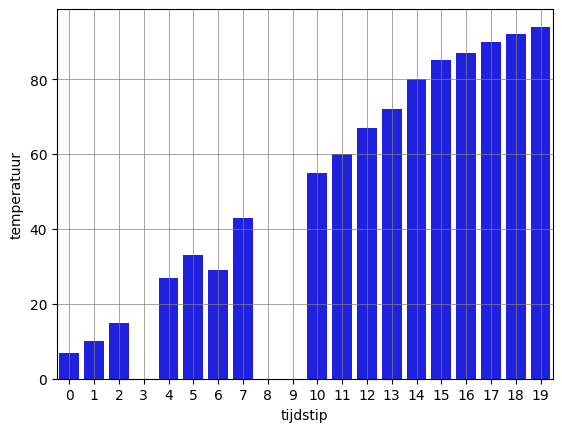

In [ ]:
ax = sns.barplot(x='tijdstip', y='temperatuur', data=dataset, color='blue')
ax.grid(color='gray', linestyle='-', linewidth=0.5)

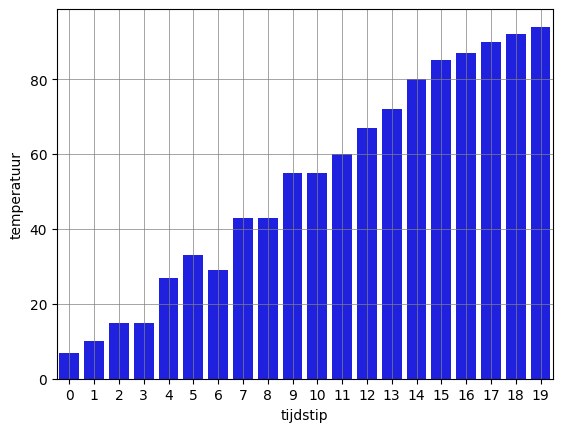

In [ ]:
# interpolatie via dichtste waarde

dataset_interpolatie = dataset.interpolate(method ='nearest')

ax = sns.barplot(x='tijdstip', y='temperatuur', data=dataset_interpolatie, color='blue')
ax.grid(color='gray', linestyle='-', linewidth=0.5)

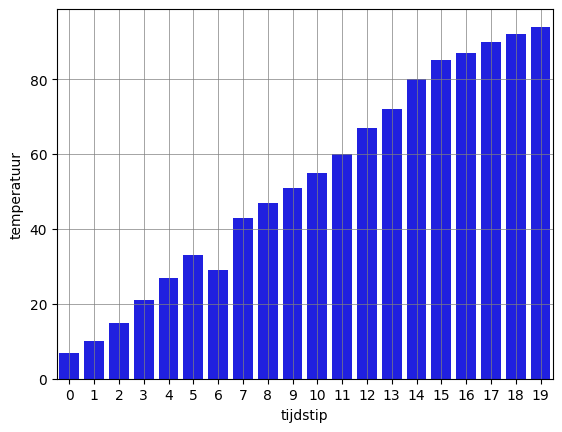

In [ ]:
# interpolatie via lineaire interpolatie waarde

dataset_interpolatie = dataset.interpolate(method ='linear', limit_direction ='forward')

ax = sns.barplot(x='tijdstip', y='temperatuur', data=dataset_interpolatie, color='blue')
ax.grid(color='gray', linestyle='-', linewidth=0.5)

## Resampling

In [ ]:
dataset = pd.read_csv('apple.csv', parse_dates =['date'], index_col ='date')
dataset.head(20)

<ipython-input-13-1e36755efb74>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset = pd.read_csv('apple.csv', parse_dates =['date'], index_col ='date')


,close,volume,open,high,low
date,,,,,
2025-05-20 16:00:00,192.23,"46,541,444",191.72,197.18,191.4501
2018-11-13 00:00:00,192.23,46725710.0000,191.63,197.18,191.4501
2018-11-12 00:00:00,194.17,50991030.0000,199.00,199.85,193.7900
2018-11-09 00:00:00,204.47,34317760.0000,205.55,206.01,202.2500
2018-11-08 00:00:00,208.49,25289270.0000,209.98,210.12,206.7500
2018-11-07 00:00:00,209.95,33291640.0000,205.97,210.06,204.1300
2018-11-06 00:00:00,203.77,31774720.0000,201.92,204.72,201.6900
2018-11-05 00:00:00,201.59,66072170.0000,204.30,204.39,198.1700
2018-11-02 00:00:00,207.48,91046560.0000,209.55,213.65,205.4300


In [ ]:
# Maandelijkse resampling

weekly_resampled_data = dataset.close.resample('M').mean()
print(weekly_resampled_data)

date
2017-11-30    172.090769
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    167.638947
2018-03-31    174.496190
                 ...    
2025-01-31           NaN
2025-02-28           NaN
2025-03-31           NaN
2025-04-30           NaN
2025-05-31    192.230000
Freq: ME, Name: close, Length: 91, dtype: float64


<ipython-input-14-1a13a4eab599>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  weekly_resampled_data = dataset.close.resample('M').mean()


## One-hot encoding

In [ ]:
raw_data = {'food_name': ['Apple', 'Chicken', 'Broccoli', 'Chocolat'],'Calories': [95, 231, 50, 549]}
dataset = pd.DataFrame(raw_data)
dataset.head()

,food_name,Calories
0,Apple,95
1,Chicken,231
2,Broccoli,50
3,Chocolat,549


In [ ]:
dataset = pd.concat([dataset,pd.get_dummies(dataset['food_name'], prefix='food')],axis=1)
dataset.drop(['food_name'],axis=1, inplace=True)
dataset.head()

,Calories,food_Apple,food_Broccoli,food_Chicken,food_Chocolat
0,95,True,False,False,False
1,231,False,False,True,False
2,50,False,True,False,False
3,549,False,False,False,True


In [ ]:
# Dummy variable trap vermijden

dataset.drop(['food_Apple'],axis=1,inplace=True)
dataset.head()

,Calories,food_Broccoli,food_Chicken,food_Chocolat
0,95,False,False,False
1,231,False,True,False
2,50,True,False,False
3,549,False,False,True


## Optioneel ----- Plotly (niet voor examen)

Voor deze demo is het nodig om de visualisatielibrary Plotly te installeren:
https://plot.ly/python/getting-started/#installation

In [ ]:
! pip install plotly

In [ ]:
# Standard plotly imports
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [ ]:
!pip install chart_studio
!pip install cufflinks


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.3 MB/s eta 0:00:00


In [ ]:
# Standard plotly imports
# import chart_studio.plotly as py # This import is likely causing the error and might not be needed
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode# Using plotly + cufflinks in offline mode
import cufflinks

# Initialize cufflinks for offline mode
cufflinks.go_offline(connected=True)
# Initialize plotly for offline mode in Jupyter notebooks
init_notebook_mode(connected=True)

In [ ]:
dataset =pd.read_csv('heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1.0,1
1,37.0,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2.0,1
2,41.0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2.0,1
3,56.0,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2.0,1
4,57.0,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2.0,1


In [ ]:
dataset['age'].iplot(kind='hist', xTitle='age',
                  yTitle='count', title='Leeftijd van de patienten')

ValueError: 
    Invalid value of type 'builtins.str' received for the 'color' property of histogram.marker
        Received value: 'rgba(255, 153, 51, np.float64(1.0))'

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen
      - A number that will be interpreted as a color
        according to histogram.marker.colorscale
      - A list or array of any of the above

In [ ]:
import cufflinks as cf
cf.go_offline()

dataset['age'].iplot(kind='hist',
                     bins=20,
                     xTitle='Leeftijd',
                     yTitle='Aantal patiënten',
                     title='Leeftijd van de patiënten')


ValueError: 
    Invalid value of type 'builtins.str' received for the 'color' property of histogram.marker
        Received value: 'rgba(255, 153, 51, np.float64(1.0))'

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen
      - A number that will be interpreted as a color
        according to histogram.marker.colorscale
      - A list or array of any of the above

In [ ]:
dataset.pivot(columns='sex', values='age').iplot(
        kind='box',
        yTitle='leeftijd',
        title='Boxplots van de leeftijden van vrouwen en mannen')

Zeker! Hier is een **korte uitleg per blokje code** uit jouw notebook over interpolatie, resampling, one-hot encoding en Plotly-visualisatie:

---

## 📈 **Interpolatie**

```python
dataset = pd.read_csv('temperaturen.csv')
```

→ Leest temperatuurdata per tijdstip in.

### 🔹 Nearest interpolatie

```python
dataset_interpolatie = dataset.interpolate(method='nearest')
```

→ Vult ontbrekende waarden aan met de **dichtstbijzijnde bestaande waarde**.

### 🔹 Lineaire interpolatie

```python
dataset_interpolatie = dataset.interpolate(method='linear', limit_direction='forward')
```

→ Vult ontbrekende waarden aan met **lineair gemiddelde tussen omliggende waarden**.

Beide visualiseer je met:

```python
sns.barplot(x='tijdstip', y='temperatuur', data=dataset_interpolatie, color='blue')
```

→ Tekent een staafdiagram met de ingevulde waarden.

---

## 🗓️ **Resampling (tijdreeksen)**

```python
dataset = pd.read_csv('apple.csv', parse_dates=['date'], index_col='date')
weekly_resampled_data = dataset.close.resample('M').mean()
```

→ Zet de tijdskolom om in een datumindex, en berekent het **maandelijkse gemiddelde** van de ‘close’-prijs (bv. van aandelen).

---

## 🧠 **One-hot encoding**

```python
raw_data = {'food_name': ['Apple', 'Chicken', 'Broccoli', 'Chocolat'],'Calories': [95, 231, 50, 549]}
dataset = pd.DataFrame(raw_data)
```

→ Maak een dataset met voeding en calorieën.

```python
pd.get_dummies(dataset['food_name'], prefix='food')
```

→ Zet de **categorische kolom** om naar **dummyvariabelen**.

```python
dataset.drop(['food_Apple'], axis=1, inplace=True)
```

→ Vermijdt de **dummy variable trap** door 1 kolom weg te laten (nodig bij regressie).

---

## 📊 **Plotly + Cufflinks visualisatie**

### 🔹 Histogram

```python
dataset['age'].iplot(kind='hist',
                     bins=20,
                     xTitle='Leeftijd',
                     yTitle='Aantal patiënten',
                     title='Leeftijd van de patiënten')
```

→ Tekent een histogram van de leeftijden met 20 bins.

### 🔹 Boxplot per geslacht

```python
dataset.pivot(columns='sex', values='age').iplot(
        kind='box',
        yTitle='leeftijd',
        title='Boxplots van de leeftijden van vrouwen en mannen')
```

→ Tekent **2 boxplots**: eentje voor vrouwen (sex = 0) en mannen (sex = 1).

---

## 🧪 Samengevat:

| Techniek             | Doel                               |
| -------------------- | ---------------------------------- |
| `interpolate()`      | Missende waarden aanvullen         |
| `resample()`         | Tijdreeksen hergroeperen           |
| `get_dummies()`      | Categorieën omzetten naar numeriek |
| `iplot(kind='hist')` | Histogram tekenen met Plotly       |
| `iplot(kind='box')`  | Boxplot per groep                  |

Laat me weten als je één van deze methodes visueel in een echte dataset wil testen!
